<a href="https://colab.research.google.com/github/sonuuno2020/CNN/blob/main/06_Transfer_learning_with_tensorflow_(_part_3_Scale_up_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **We have seen the 2 techniques of transfer learning i.e feature extraction and fine tunning , now it's time to scale up what all we learn...for 101 clases**


In [ ]:
# check gor GPU
!nvidia-smi

Tue Feb  1 02:43:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **import helper functions**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2022-02-01 02:43:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-01 02:43:26 (49.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data,walk_through_dir,plot_loss_curves

## **Get Data**

**here we are going to get 101 classes data**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data('101_food_classes_10_percent.zip')

--2022-02-01 02:43:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   180MB/s    in 9.0s    

2022-02-01 02:43:40 (172 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/clam_chowder'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/poutine'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/french_onion_soup'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/miso_soup'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/edamame'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/peking_duck'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pancakes'.
There are 0 directories and 250 images in '101_food_

In [ ]:
train_dir='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'

In [ ]:
# setup data inputs
import tensorflow as tf

train_data_10_per=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                      image_size=(224,224),
                                                                      label_mode='categorical')

test_data_10_per=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                     image_size=(224,224),
                                                                     label_mode='categorical',
                                                                     shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## **Train a model**

**Steps :**
* create a modelCheckpoint callback
* create a data augumentation layer
* build a model functionally 
* compile a model
* extract feature

In [ ]:
# create checkpoint callback

checkpoint_path='101_food_classes_10_percent_checkpoints/'

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       mointor='val_loss',
                                                       save_weights_only=True,
                                                       save_best_only=True)

In [ ]:
# create data augumentation layer

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential

# sequential model for data augumentation 

data_augumentation=tf.keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomZoom(0.2)                                        
],name='data_augmentation_layer')

In [ ]:
# create a base model

base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x=data_augumentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

output=layers.Dense(len(train_data_10_per.class_names),activation='softmax',name='output_layer')(x)

model=tf.keras.Model(inputs,output)



16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
# compile model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# fit the model
history=model.fit(train_data_10_per,
                  epochs=5,
                  validation_data=test_data_10_per,
                  steps_per_epoch=len(train_data_10_per),
                  validation_steps=int(0.15*len(test_data_10_per)),
                  callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 131s 486ms/step - loss: 3.4726 - accuracy: 0.2504 - val_loss: 2.6920 - val_accuracy: 0.3893
Epoch 2/5
237/237 [==============================] - 90s 379ms/step - loss: 2.3371 - accuracy: 0.4655 - val_loss: 2.2476 - val_accuracy: 0.4608
Epoch 3/5
237/237 [==============================] - 82s 346ms/step - loss: 1.9752 - accuracy: 0.5274 - val_loss: 2.1024 - val_accuracy: 0.4748
Epoch 4/5
237/237 [==============================] - 75s 316ms/step - loss: 1.7539 - accuracy: 0.5783 - val_loss: 2.0280 - val_accuracy: 0.4817
Epoch 5/5
237/237 [==============================] - 74s 310ms/step - loss: 1.6017 - accuracy: 0.6073 - val_loss: 1.9735 - val_accuracy: 0.4910


In [ ]:
model.evaluate(test_data_10_per)

790/790 [==============================] - 101s 128ms/step - loss: 1.7247 - accuracy: 0.5490


[1.72468900680542, 0.5489900708198547]

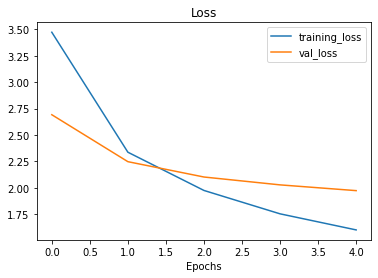

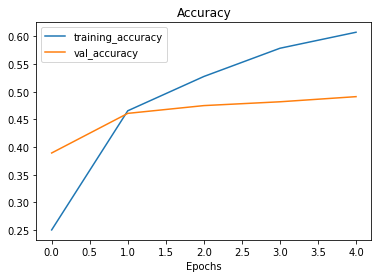

In [ ]:
plot_loss_curves(history)

🤔 It seems our model overfits...

## **Fine tunning**

In [ ]:
# unfreeze all layers of base model

base_model.trainable=True

# freezing all layers except 5 
for layer in base_model.layers[:-5]:
  layer.trainable=False


In [ ]:
# recompile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
for layer in model.layers:
  print(layer.name)

input_layer
data_augmentation_layer
efficientnetb0
global_average_pooling_layer
output_layer


In [ ]:
for i,layer in enumerate(model.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
initial_epoch = history.epoch
initial_epoch

[0, 1, 2, 3, 4]

In [ ]:
fine_tune_epoch = len(initial_epoch) + 5

In [ ]:
history_1=model.fit(train_data_10_per,
                    epochs=fine_tune_epoch,
                    validation_data=test_data_10_per,
                    validation_steps=int(0.15*len(test_data_10_per)),
                    initial_epoch=len(initial_epoch)-1)



Epoch 5/10
237/237 [==============================] - 83s 313ms/step - loss: 1.3648 - accuracy: 0.6478 - val_loss: 1.9418 - val_accuracy: 0.4963
Epoch 6/10
237/237 [==============================] - 71s 296ms/step - loss: 1.2283 - accuracy: 0.6776 - val_loss: 1.9300 - val_accuracy: 0.5021
Epoch 7/10
237/237 [==============================] - 69s 288ms/step - loss: 1.1452 - accuracy: 0.6966 - val_loss: 1.9256 - val_accuracy: 0.5037
Epoch 8/10
237/237 [==============================] - 66s 276ms/step - loss: 1.0700 - accuracy: 0.7175 - val_loss: 1.9521 - val_accuracy: 0.4966
Epoch 9/10
237/237 [==============================] - 64s 269ms/step - loss: 1.0160 - accuracy: 0.7319 - val_loss: 1.9156 - val_accuracy: 0.5061
Epoch 10/10
237/237 [==============================] - 63s 265ms/step - loss: 0.9590 - accuracy: 0.7415 - val_loss: 1.9413 - val_accuracy: 0.5082


## **Evaluate the performance of model**


In [ ]:
model.evaluate(test_data_10_per)

790/790 [==============================] - 100s 127ms/step - loss: 1.6388 - accuracy: 0.5723


[1.6387654542922974, 0.5723168253898621]

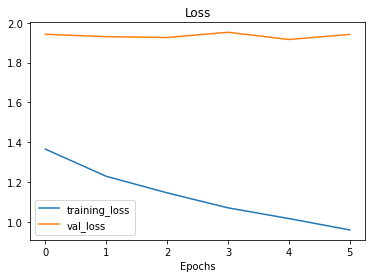

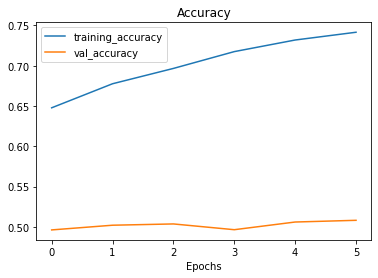

In [ ]:
plot_loss_curves(history_1)

In [ ]:
from helper_functions import compare_historys

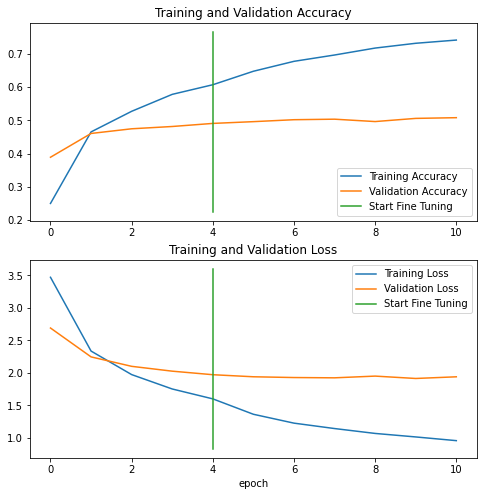

In [ ]:
compare_historys(history,history_1)

## **make prediction of model**

In [ ]:
pred_probs=model.predict(test_data_10_per,verbose=1)

790/790 [==============================] - 108s 133ms/step


In [ ]:
pred_probs[5]

array([9.59807483e-04, 3.49028523e-05, 1.31793414e-07, 2.56356558e-09,
       2.23626131e-07, 2.13581799e-07, 1.29262787e-07, 5.66356584e-06,
       1.83107809e-03, 1.83868478e-03, 3.99661076e-06, 3.59350558e-08,
       1.04702406e-06, 2.51486199e-07, 7.32485603e-07, 4.93577681e-06,
       5.18049390e-08, 1.25840444e-07, 6.75284420e-04, 1.92192466e-08,
       9.71215413e-05, 7.77492914e-08, 2.48589998e-07, 3.86526921e-07,
       9.52805390e-09, 2.35413239e-07, 3.44092513e-07, 5.73619552e-09,
       2.08503025e-06, 2.31073130e-07, 1.06266427e-07, 7.60033754e-06,
       3.03731781e-07, 8.83475053e-08, 4.65747371e-06, 3.19441718e-08,
       1.18190692e-05, 3.73459370e-05, 5.49872420e-05, 6.45724683e-08,
       5.09834499e-04, 5.64363006e-07, 3.12324300e-05, 2.16871485e-04,
       2.76293258e-06, 3.46586887e-07, 2.77219803e-09, 3.29181436e-04,
       1.27633101e-07, 3.21740736e-05, 1.05738027e-05, 1.61526657e-06,
       7.10433369e-06, 2.41973874e-04, 1.95117718e-05, 9.28543959e-05,
      

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
790*32 # 790 batchs of 32 images so predictions are 25250

25280

In [ ]:
tf.argmax(pred_probs[5]),max(pred_probs[5])

(<tf.Tensor: shape=(), dtype=int64, numpy=78>, 0.97925764)

In [ ]:
test_data_10_per.class_names[78]

'poutine'